In [4]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPoint
from pyproj import CRS, Transformer
import requests
import os

In [11]:
#Function to read and mere the data
def read_and_merge_files(file_list):
    dfs = [pd.read_fwf(file) for file in file_list]
    merged_df = pd.concat(dfs, ignore_index=True)
    return merged_df

In [12]:
#List of data sets
file_list = ["ITRF2020_DORIS_cart.txt", "ITRF2020_GNSS_cart.txt", "ITRF2020_SLR_cart.txt", "ITRF2020_VLBI_cart.txt"]
data = read_and_merge_files(file_list)

In [16]:
#Confirm Merged data
data.head()

,id,name,type,code,x,y,z,dx,dy,dz
0,10002S018,Grasse (OCA),DORIS,GR3B,4.581680e+06,556166.4818,4.389372e+06,0.002,0.0025,0.002
1,10002S019,Grasse (OCA),DORIS,GR4B,4.581681e+06,556166.9141,4.389371e+06,0.0019,0.0024,0.0017
2,10003S001,Toulouse,DORIS,TLSA,4.628047e+06,119670.6873,4.372788e+06,0.0054,0.0062,0.0051
3,10003S003,Toulouse,DORIS,TLHA,4.628693e+06,119985.0770,4.372105e+06,0.0034,0.0042,0.0032
4,10003S005,Toulouse,DORIS,TLSB,4.628694e+06,119985.0787,4.372105e+06,0.0026,0.0039,0.0025


##### Data Exploration

In [17]:
data.shape

(1842, 10)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842 entries, 0 to 1841
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1842 non-null   object 
 1   name    1840 non-null   object 
 2   type    1842 non-null   object 
 3   code    1842 non-null   object 
 4   x       1842 non-null   float64
 5   y       1842 non-null   float64
 6   z       1842 non-null   float64
 7   dx      1842 non-null   object 
 8   dy      1842 non-null   object 
 9   dz      1842 non-null   object 
dtypes: float64(3), object(7)
memory usage: 144.0+ KB


In [26]:
#Turn dataframe into Geodataframe in EPSG 4326
gdf = gpd.GeoDataFrame(data, geometry=data.geometry, crs=4326)

In [27]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [30]:
gdf.head()

,id,name,type,code,x,y,z,dx,dy,dz,geometry
0,10002S018,Grasse (OCA),DORIS,GR3B,4.581680e+06,556166.4818,4.389372e+06,0.002,0.0025,0.002,POINT Z (4581680.3279 556166.4818 4389371.6042)
1,10002S019,Grasse (OCA),DORIS,GR4B,4.581681e+06,556166.9141,4.389371e+06,0.0019,0.0024,0.0017,POINT Z (4581681.0445 556166.9141 4389370.973)
2,10003S001,Toulouse,DORIS,TLSA,4.628047e+06,119670.6873,4.372788e+06,0.0054,0.0062,0.0051,POINT Z (4628047.2485 119670.6873 4372788.0168)
3,10003S003,Toulouse,DORIS,TLHA,4.628693e+06,119985.0770,4.372105e+06,0.0034,0.0042,0.0032,POINT Z (4628693.461 119985.077 4372104.5078)
4,10003S005,Toulouse,DORIS,TLSB,4.628694e+06,119985.0787,4.372105e+06,0.0026,0.0039,0.0025,POINT Z (4628693.6567 119985.0787 4372104.7202)


In [38]:
#Create new columns site_id and instrument_id
gdf["site_id"] = gdf["id"].str[:5]
gdf["instrument_id"] = gdf["id"].str[5:]

In [39]:
gdf.head()

,id,name,type,code,x,y,z,dx,dy,dz,geometry,site_id,instrument_id
0,10002S018,Grasse (OCA),DORIS,GR3B,4.581680e+06,556166.4818,4.389372e+06,0.002,0.0025,0.002,POINT Z (4581680.3279 556166.4818 4389371.6042),10002,S018
1,10002S019,Grasse (OCA),DORIS,GR4B,4.581681e+06,556166.9141,4.389371e+06,0.0019,0.0024,0.0017,POINT Z (4581681.0445 556166.9141 4389370.973),10002,S019
2,10003S001,Toulouse,DORIS,TLSA,4.628047e+06,119670.6873,4.372788e+06,0.0054,0.0062,0.0051,POINT Z (4628047.2485 119670.6873 4372788.0168),10003,S001
3,10003S003,Toulouse,DORIS,TLHA,4.628693e+06,119985.0770,4.372105e+06,0.0034,0.0042,0.0032,POINT Z (4628693.461 119985.077 4372104.5078),10003,S003
4,10003S005,Toulouse,DORIS,TLSB,4.628694e+06,119985.0787,4.372105e+06,0.0026,0.0039,0.0025,POINT Z (4628693.6567 119985.0787 4372104.7202),10003,S005


In [43]:
#Drop unnecessary columns
gdf = gdf.drop(columns=['x','y','z','dx','dy','dz'])

In [44]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1842 entries, 0 to 1841
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             1842 non-null   object  
 1   name           1840 non-null   object  
 2   type           1842 non-null   object  
 3   code           1842 non-null   object  
 4   geometry       1842 non-null   geometry
 5   site_id        1842 non-null   object  
 6   instrument_id  1842 non-null   object  
dtypes: geometry(1), object(6)
memory usage: 100.9+ KB


In [46]:
#Save dataframe to file shape file and geojson format
gdf.to_file("instruments.shp")
#gdf.to_file("instruments.geojson")

Creation of the second SHP (sites):

Keep only the instruments that belongs to a site (look at the five first numbers of the DOMES (id) number) which hosts at least 3 instruments from 2 different measurement techniques (GNSS, DORIS, SLR or VLBI).

In [47]:
#Function to select sites that meet the criteria
def filter_sites(df):    
    # Group by site_id
    grouped = df.groupby('site_id')
    
    # Filter sites with at least 3 instruments from at least 2 techniques
    valid_sites = []
    for site_id, group in grouped:
        if len(group) >= 3 and group['type'].nunique() >= 2:
            valid_sites.append(group)
    
    return pd.concat(valid_sites)

In [48]:
selected_sites = filter_sites(gdf)

In [50]:
selected_sites.shape

(538, 7)

In [51]:
selected_sites.head()

,id,name,type,code,geometry,site_id,instrument_id
0,10002S018,Grasse (OCA),DORIS,GR3B,POINT Z (4581680.3279 556166.4818 4389371.6042),10002,S018
1,10002S019,Grasse (OCA),DORIS,GR4B,POINT Z (4581681.0445 556166.9141 4389370.973),10002,S019
200,10002M006,Grasse (OCA),GNSS,GRAS,POINT Z (4581690.7636 556115.021 4389360.902),10002,M006
201,10002M010,Grasse (OCA),GNSS,GRAC,POINT Z (4581708.2061 556132.824 4389341.3791),10002,M010
1542,10002S001,Grasse (OCA),SLR,7835,POINT Z (4581691.3906 556159.885 4389359.714),10002,S001


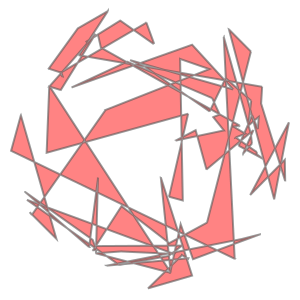

In [68]:
#polygon from selected points
Polygon(selected_sites["geometry"])  # Generate convex hull

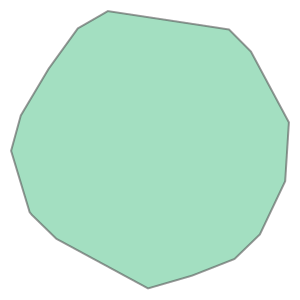

In [70]:
#Polygon using convex hull
full_circle = Polygon(selected_sites["geometry"]).convex_hull
full_circle

In [80]:
#Save the Polygon data as site_polygons
site_polygons = gpd.GeoSeries(full_circle).__geo_interface__
#site_polygons.append({'site_id': site_id, 'geometry': polygon})
site_polygons

{'type': 'FeatureCollection',
 'features': [{'id': '0',
   'type': 'Feature',
   'properties': {},
   'geometry': {'type': 'Polygon',
    'coordinates': (((-33795.1967, -6377522.6431, -82120.7164),
      (-33879.1762, -6377521.9608, -82085.4313),
      (-4147138.0401, -4152218.9773, -2490023.7545),
      (-5245798.6036, -3081049.3788, -1909175.3389),
      (-5345867.838, -2958246.0581, -1824623.4342),
      (-5345874.1188, -2958238.0951, -1824623.6265),
      (-6178322.4958, -202694.7957, -1566024.3545),
      (-6178323.9849, -202689.0317, -1566022.7395),
      (-5743537.9958, 1380503.9665, -2397896.2204),
      (-5739994.1133, 1387548.06, -2402084.463),
      (-4490618.04, 3483908.6216, 2884899.3015),
      (-3184364.6122, 5291037.1742, 1590413.564),
      (-3184357.1896, 5291042.448, 1590419.532),
      (-3184354.6852, 5291044.0345, 1590420.2452),
      (-3184318.7225, 5291065.5079, 1590418.24),
      (-1837002.7156, 6065627.3421, -716183.3123),
      (-1836964.1476, 6065627.0378, -7

In [83]:
#Save polygon as geojson
with open('sites.geojson', 'w') as f:
    json.dump(site_polygons, f, indent=4)
#Or sites_polygon.to_json()
#sites_polygon.to_file(path, driver="GeoJSON")

In [89]:
list(full_circle.exterior.coords)

[(-33795.1967, -6377522.6431, -82120.7164),
 (-33879.1762, -6377521.9608, -82085.4313),
 (-4147138.0401, -4152218.9773, -2490023.7545),
 (-5245798.6036, -3081049.3788, -1909175.3389),
 (-5345867.838, -2958246.0581, -1824623.4342),
 (-5345874.1188, -2958238.0951, -1824623.6265),
 (-6178322.4958, -202694.7957, -1566024.3545),
 (-6178323.9849, -202689.0317, -1566022.7395),
 (-5743537.9958, 1380503.9665, -2397896.2204),
 (-5739994.1133, 1387548.06, -2402084.463),
 (-4490618.04, 3483908.6216, 2884899.3015),
 (-3184364.6122, 5291037.1742, 1590413.564),
 (-3184357.1896, 5291042.448, 1590419.532),
 (-3184354.6852, 5291044.0345, 1590420.2452),
 (-3184318.7225, 5291065.5079, 1590418.24),
 (-1837002.7156, 6065627.3421, -716183.3123),
 (-1836964.1476, 6065627.0378, -716217.4293),
 (3597814.1968, 5240899.8861, -516791.1955),
 (3602867.3665, 5238179.3794, -516268.0876),
 (4583132.6673, 4250944.2648, 1266229.2999),
 (6287387.6251, 1071576.7733, 39143.6218),
 (6287388.718, 1071574.6391, 39147.4895),
 